# Project 3: Time-Series Forecasting & Volatility Analysis (AAPL)

## Data Download & Setup


In [1]:
## Install packages 

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")


In [2]:
## Download APPLE Stock 

stock = "AAPL"

data = yf.download(stock, start="2015-01-01", end="2025-01-01")

data.head()



[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.237549,24.705318,23.798599,24.694233,212818400
2015-01-05,23.554733,24.086793,23.368513,24.006984,257142000
2015-01-06,23.556959,23.816338,23.195601,23.619033,263188400
2015-01-07,23.887281,23.987042,23.654504,23.765350,160423600
2015-01-08,24.805079,24.862719,24.097882,24.215380,237458000


In [3]:
# Keep only Close column

prices = data["Close"].copy()
prices.head()


Ticker,AAPL
Date,
2015-01-02,24.237549
2015-01-05,23.554733
2015-01-06,23.556959
2015-01-07,23.887281
2015-01-08,24.805079


In [4]:
## save to csv data

import os

os.makedirs("../data", exist_ok=True)
prices.to_csv("../data/aapl_prices.csv")


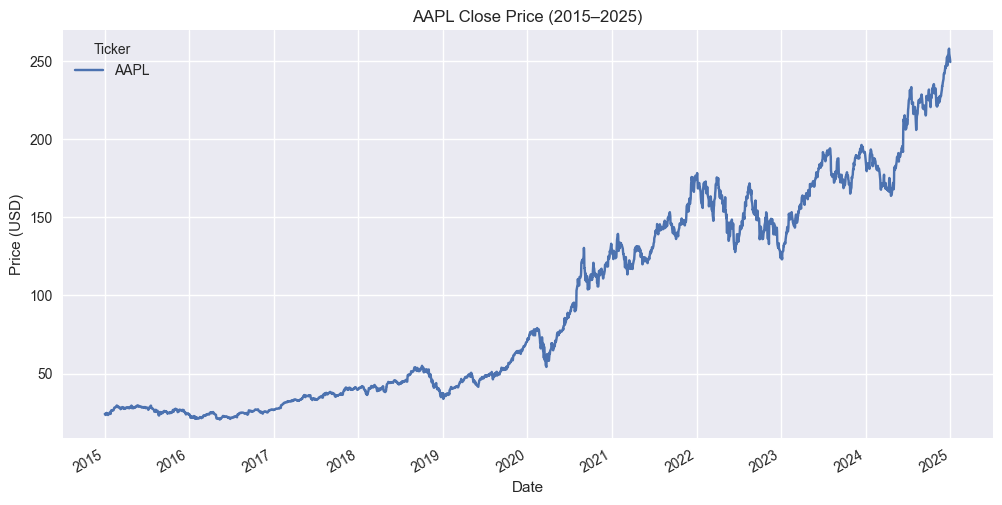

In [5]:
## plot historic price 

prices.plot(figsize=(12, 6), title="AAPL Close Price (2015–2025)")
plt.ylabel("Price (USD)")
plt.show()


## Returns & Rolling Volatility

Goal:
Turn prices into daily returns, then measure how risky the series is over time using rolling volatility.

In [6]:
prices = pd.read_csv("../data/aapl_prices.csv", index_col=0)
prices.index = pd.to_datetime(prices.index)

prices.head()


,AAPL
Date,
2015-01-02,24.237549
2015-01-05,23.554733
2015-01-06,23.556959
2015-01-07,23.887281
2015-01-08,24.805079


In [7]:
# Daily returns: (P_t / P_{t-1}) - 1

returns = prices.pct_change()

# Drop the first NaN
returns = returns.dropna()

returns.head()


,AAPL
Date,
2015-01-05,-0.028172
2015-01-06,0.000094
2015-01-07,0.014022
2015-01-08,0.038422
2015-01-09,0.001073


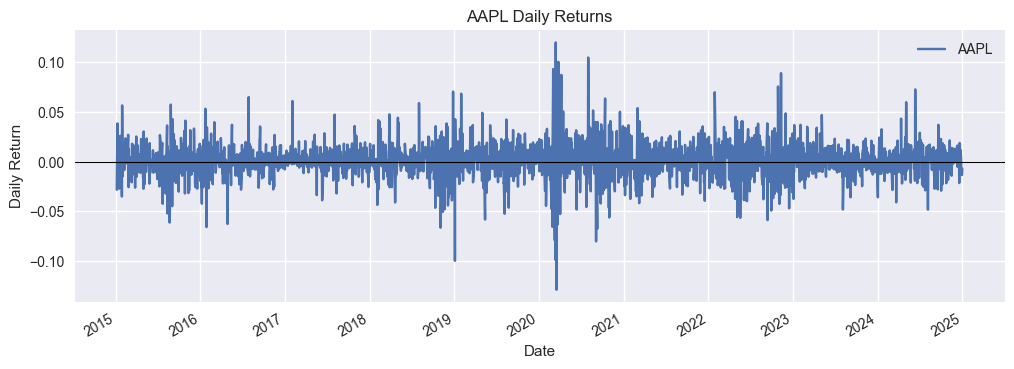

In [8]:
## Plot daily Return 

returns.plot(figsize=(12, 4))
plt.title("AAPL Daily Returns")
plt.axhline(0, color="black", linewidth=0.8)
plt.ylabel("Daily Return")
plt.show()


In [9]:
window = 21  # ~1 month

# Rolling daily volatility
rolling_vol_daily = returns.rolling(window=window).std()

# Annualized rolling volatility (more common in finance)
rolling_vol_annual = rolling_vol_daily * np.sqrt(252)

rolling_vol_annual.head(25)


,AAPL
Date,
2015-01-05,NaN
2015-01-06,NaN
2015-01-07,NaN
2015-01-08,NaN
2015-01-09,NaN
2015-01-12,NaN
2015-01-13,NaN
2015-01-14,NaN
2015-01-15,NaN


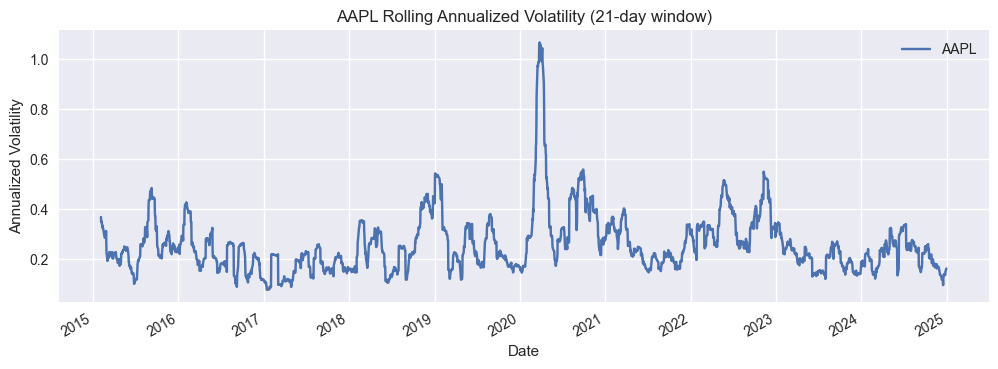

In [10]:
## Plot rolling annualized volatility

rolling_vol_annual.plot(figsize=(12, 4))
plt.title("AAPL Rolling Annualized Volatility (21-day window)")
plt.ylabel("Annualized Volatility")
plt.show()


In [11]:
## Save returns & volatility to data/

returns.to_csv("../data/aapl_returns.csv")
rolling_vol_annual.to_csv("../data/aapl_rolling_vol_annual.csv")


## Build an ARIMA Forecast Model

Goal today
✔ Fit an ARIMA model on daily returns
✔ Make a short-term forecast
✔ Visualize it

## ARIMA Model

It predicts the next value in a time-series using:

Auto-Regressive part (past values)

Integrated part (differences)

MAving Average (past errors)

For returns, we often start with:

ARIMA(1,0,1)

Meaning:

1 lag of returns

no differencing (already stationary)

1 lag of error term

In [12]:
from statsmodels.tsa.arima.model import ARIMA


In [13]:
model = ARIMA(returns, order=(1, 0, 1))
results = model.fit()

print(results.summary())


                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                 2515
Model:                 ARIMA(1, 0, 1)   Log Likelihood                6551.718
Date:                Mon, 05 Jan 2026   AIC                         -13095.436
Time:                        18:00:32   BIC                         -13072.116
Sample:                             0   HQIC                        -13086.972
                               - 2515                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.000      3.205      0.001       0.000       0.002
ar.L1          0.2010      0.178      1.129      0.259      -0.148       0.550
ma.L1         -0.2697      0.178     -1.514      0.1

/Users/amin/projects/time-series-forecast/venv/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/amin/projects/time-series-forecast/venv/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/amin/projects/time-series-forecast/venv/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [14]:
forecast_steps = 30

forecast = results.get_forecast(steps=forecast_steps)
mean_forecast = forecast.predicted_mean
conf_int = forecast.conf_int()



/Users/amin/projects/time-series-forecast/venv/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/amin/projects/time-series-forecast/venv/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


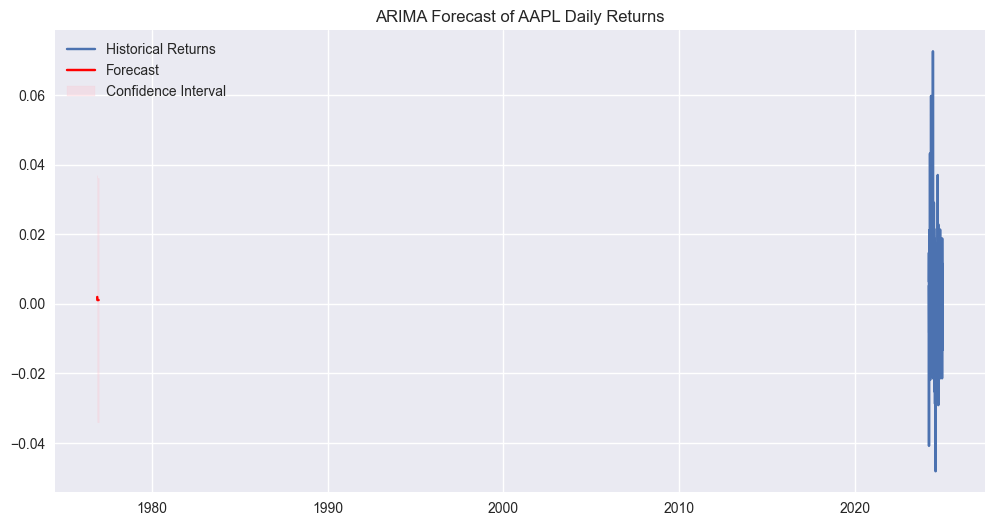

In [15]:
plt.figure(figsize=(12,6))

plt.plot(returns[-200:], label="Historical Returns")
plt.plot(mean_forecast, label="Forecast", color="red")

plt.fill_between(
    conf_int.index,
    conf_int.iloc[:,0],
    conf_int.iloc[:,1],
    color="pink",
    alpha=0.3,
    label="Confidence Interval"
)

plt.title("ARIMA Forecast of AAPL Daily Returns")
plt.legend()
plt.show()

## Model Evaluation & Residual Analysis


🧪 Check if the ARIMA model is “good”

by analyzing:

✔ residuals (errors)
✔ autocorrelation
✔ distribution shape
✔ whether markets show fat tails & volatility clustering

In [16]:
## Get the residuals

## Residuals = actual returns − model forecast
## If residuals are random → model is good
## If not → model is missing structure

residuals = results.resid

residuals.name = "Residuals"

residuals.head()


Date
2015-01-05   -0.029257
2015-01-06   -0.002961
2015-01-07    0.012338
2015-01-08    0.038063
2015-01-09    0.002746
Name: Residuals, dtype: float64

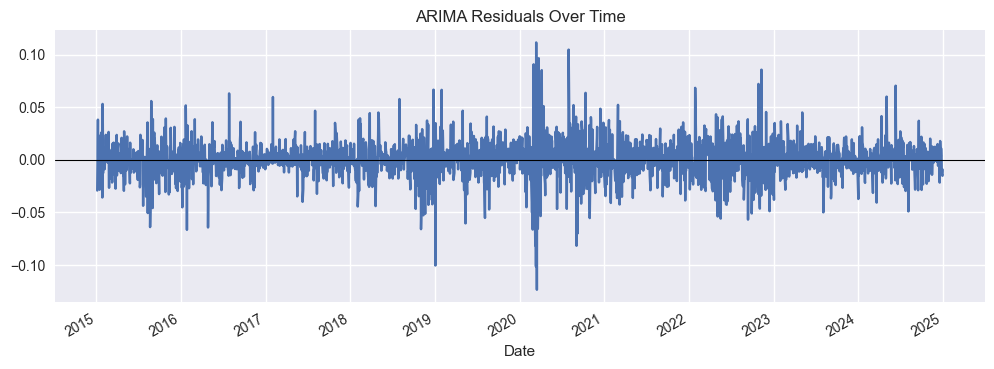

In [17]:
## Plot residuals over time
    
residuals.plot(figsize=(12,4))
plt.title("ARIMA Residuals Over Time")
plt.axhline(0, color="black", linewidth=0.8)
plt.show()


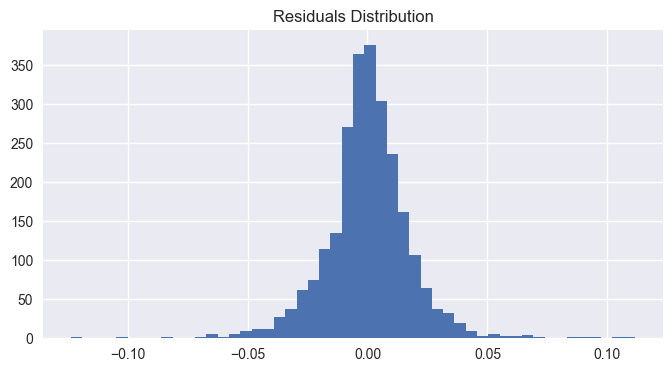

In [18]:
## Histogram of residuals

residuals.hist(bins=50, figsize=(8,4))
plt.title("Residuals Distribution")
plt.show()


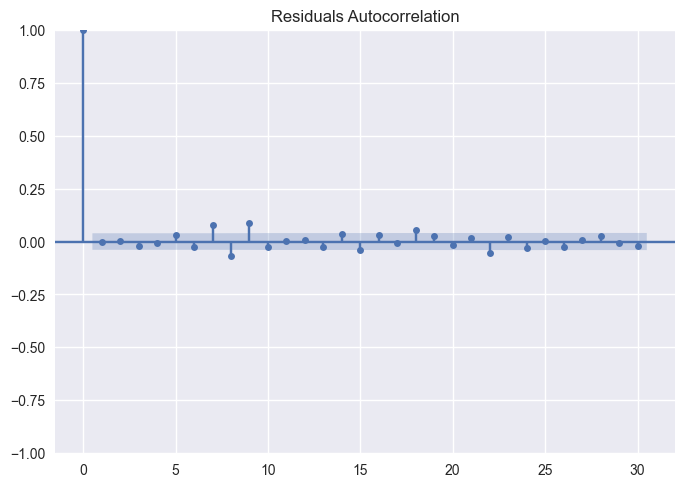

In [19]:
## Check ACF (autocorrelation)

from statsmodels.graphics.tsaplots import plot_acf

plot_acf(residuals, lags=30)
plt.title("Residuals Autocorrelation")
plt.show()


In [20]:
residuals.describe()


count    2515.000000
mean        0.000003
std         0.017885
min        -0.123546
25%        -0.008118
50%        -0.000037
75%         0.009043
max         0.111446
Name: Residuals, dtype: float64

## Forecast-Based Value-at-Risk (VaR)

Goal: 

✔ use your ARIMA forecast results
✔ estimate distribution of future returns
✔ calculate 95% Value-at-Risk (VaR)
✔ compare to historical VaR
✔ write conclusions

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

residuals = results.resid
forecast = results.get_forecast(steps=30)
mean_forecast = forecast.predicted_mean


/Users/amin/projects/time-series-forecast/venv/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/amin/projects/time-series-forecast/venv/lib/python3.14/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


We assume:

future returns ≈ normal

with

mean = model forecast

std = std of residuals

In [22]:
## residual volatility 

sigma = residuals.std()
sigma


np.float64(0.017884962062450015)

In [23]:
## Compute 95% daily VaR

var_95 = - (mean_forecast + 1.65 * sigma)
var_95


2515   -0.031485
2516   -0.030774
2517   -0.030632
2518   -0.030603
2519   -0.030597
2520   -0.030596
2521   -0.030596
2522   -0.030596
2523   -0.030596
2524   -0.030596
2525   -0.030596
2526   -0.030596
2527   -0.030596
2528   -0.030596
2529   -0.030596
2530   -0.030596
2531   -0.030596
2532   -0.030596
2533   -0.030596
2534   -0.030596
2535   -0.030596
2536   -0.030596
2537   -0.030596
2538   -0.030596
2539   -0.030596
2540   -0.030596
2541   -0.030596
2542   -0.030596
2543   -0.030596
2544   -0.030596
Name: predicted_mean, dtype: float64

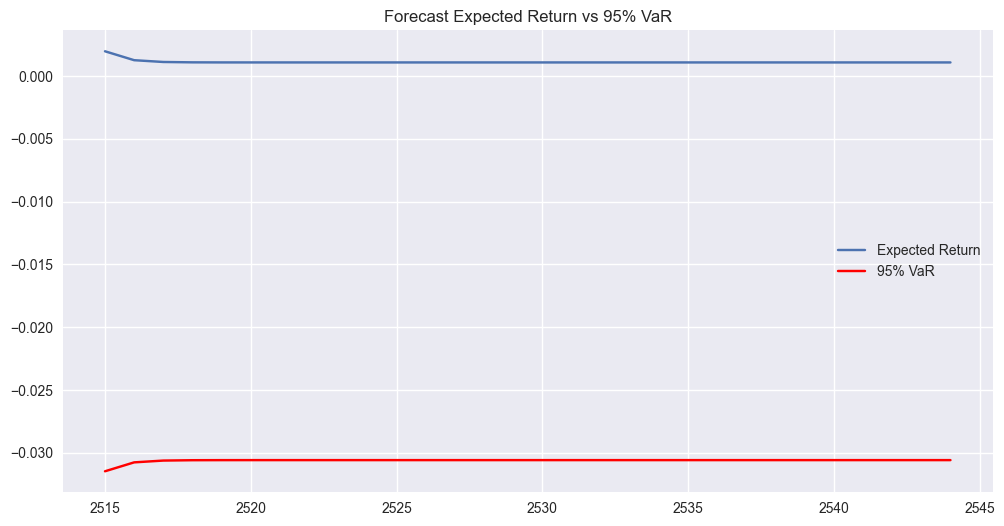

In [24]:
## Plot VaR vs Expected Return 

plt.figure(figsize=(12,6))

plt.plot(mean_forecast, label="Expected Return")
plt.plot(var_95, label="95% VaR", color="red")

plt.title("Forecast Expected Return vs 95% VaR")
plt.legend()
plt.show()


In [25]:
## Historical VaR (for comparison)

hist_var_95 = residuals.quantile(0.05)
hist_var_95


np.float64(-0.028932738120722848)

In [26]:
## Print a summary

print("Residual std: {:.2%}".format(sigma))
print("Historical 95% VaR: {:.2%}".format(hist_var_95))
print("Average Forecast 95% VaR: {:.2%}".format(var_95.mean()))


Residual std: 1.79%
Historical 95% VaR: -2.89%
Average Forecast 95% VaR: -3.06%


## INTERPRETATION


- ARIMA(1,0,1) on AAPL daily returns produced an expected return close to 0, consistent with weak-form market efficiency.
- Residual analysis showed heavy tails and volatility clustering, indicating that risk is time-varying and extreme moves are more common than under a normal distribution.
- Using residual volatility, the model estimated a 95% daily VaR of approximately –3%, meaning that on about 1 out of 20 days, losses are expected to exceed ~3%.
- Forecast VaR (-3.06%) was slightly more conservative than historical VaR (–2.89%), suggesting modestly elevated risk in the forecast period.

This project demonstrates how time-series models (ARIMA) and risk concepts (volatility, VaR) can be combined to produce forward-looking risk estimates for equity markets.



In [27]:
## Save Results

pd.DataFrame({
    "expected_return": mean_forecast,
    "var_95": var_95
}).to_csv("../data/arima_var_forecast.csv")
